## House Sales in King Country, USA
### this dataset contains house sale prices for King Country, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

**### Know each column definitions**

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Prepare Data

In [ ]:
# Import the necessary packages 

import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

from sklearn import metrics 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
import os

In [ ]:
# read data 
from google.colab import drive 
drive.mount('/content/drive')

data = pd.read_csv("drive/My Drive/Colab Notebooks/Big Data ML/kc_house_data.csv")
data.head()

Mounted at /content/drive


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  



#### In this dataset:

*   It has 21613 house information
*   It has 21 features
*   5 features (price, bathrooms, floors, lat and long) are float64 types 
*   15 features (id, bedrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15, sqft_lot15) are int64 types
*   1 feature (object) is object type
*   There is not null all feature









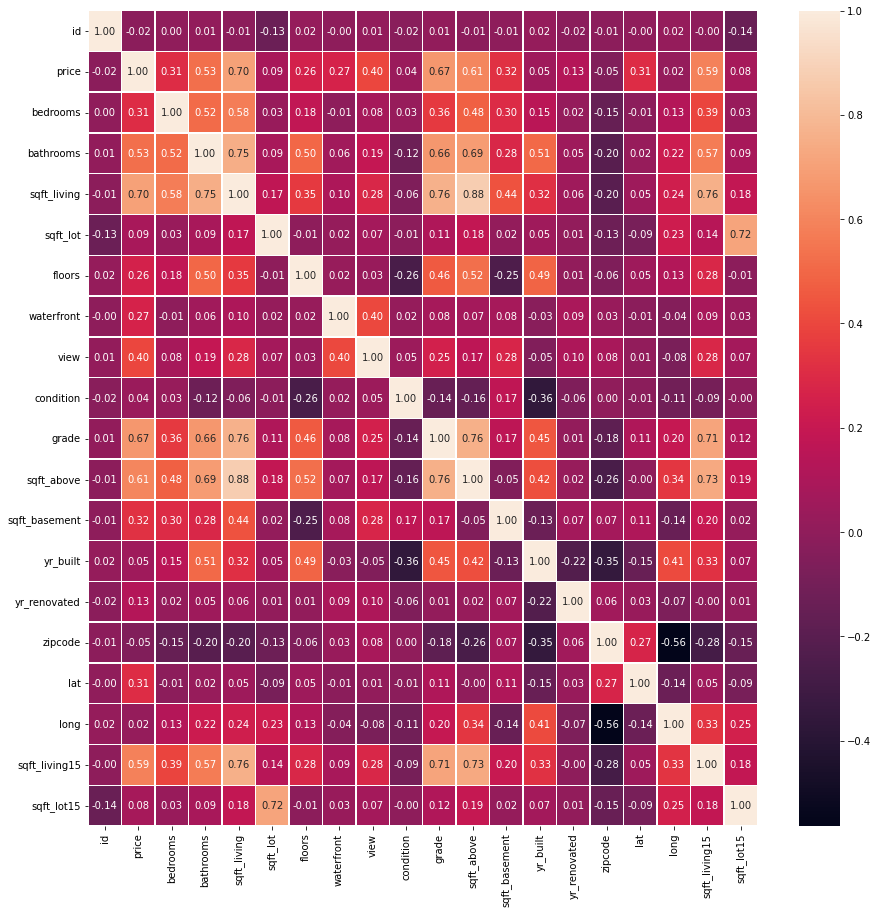

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

#### In this above correlation matrix: 
in general, there is positive relationship between price and other features. Just there is negative relationship between three feature and price. 
##### We can see that price is highly correlated with 
#####'sqft_living'(0.70),
#####'grade'(0.67), 
#####'sqft_above'(0.61), 
#####'sqft_living15'(0.59), 
#####'bathrooms(0.53)',
#####'view'(0.40),
##### 'sqft_basement'(0.32),
##### 'lat'(0.31),' 
#####'floors'(0.26),
#####'waterfront'(0.27), 
#####'yr_built'(0.05) based on the highest to lowest. 

#### Visualization 

In [ ]:
hist2 = [go.Histogram(x=data.yr_built,xbins=dict(start=np.min(data.yr_built),size=1,end=np.max(data.yr_built)),marker=dict(color='rgb(0,102,0)'))]

histlayout2 = go.Layout(title="Built Year Counts of Houses",xaxis=dict(title="Years"),yaxis=dict(title="Built Counts"))

histfig2 = go.Figure(data=hist2,layout=histlayout2)

iplot(histfig2)

#### We can see that the numbers of building built has been increased a lot since 1900. And when it passed Year 2000, it increased exponentially

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


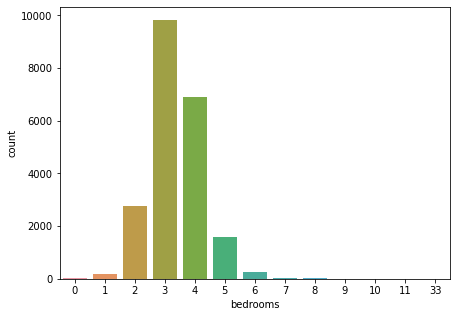

In [ ]:
plt.subplots(figsize=(7, 5))
sns.countplot(data["bedrooms"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


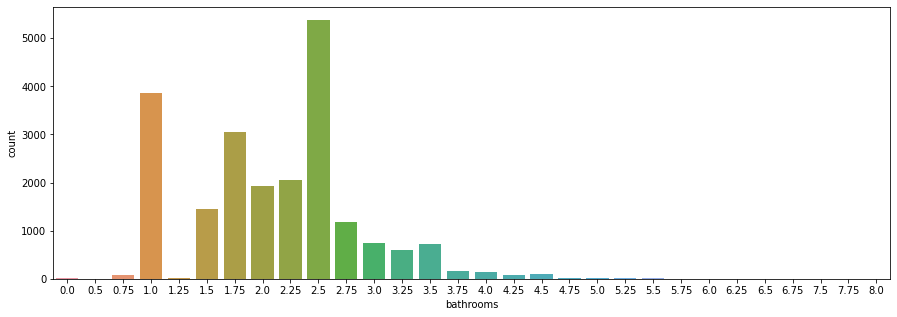

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(data["bathrooms"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


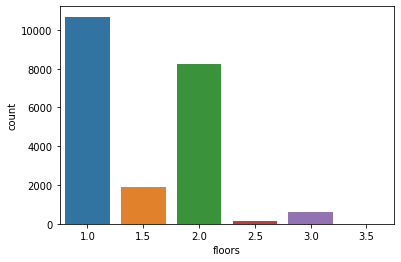

In [ ]:
sns.countplot(data["floors"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


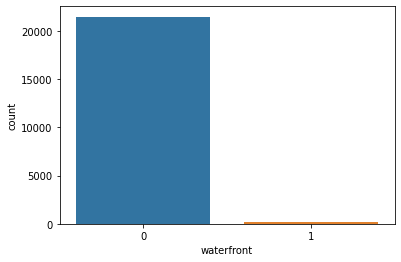

In [ ]:
sns.countplot(data["waterfront"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


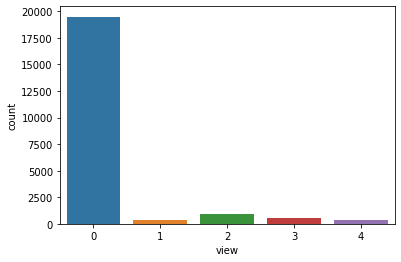

In [ ]:
sns.countplot(data["view"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


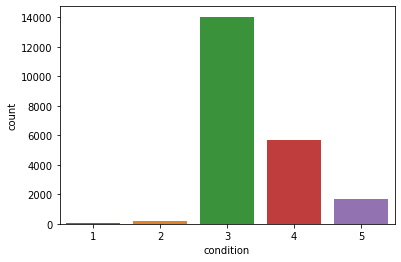

In [ ]:
sns.countplot(data["condition"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


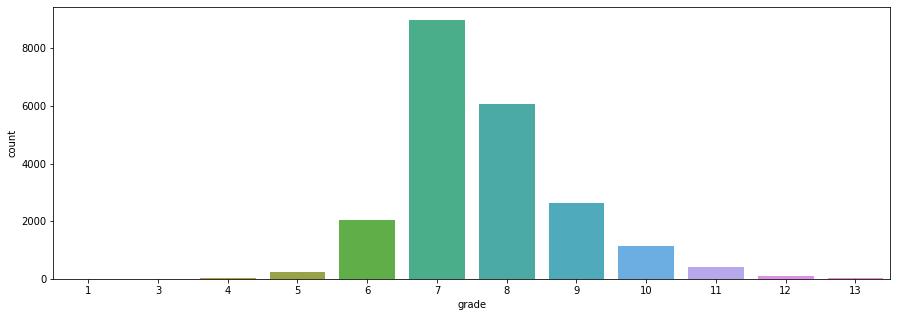

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(data["grade"])
plt.show()

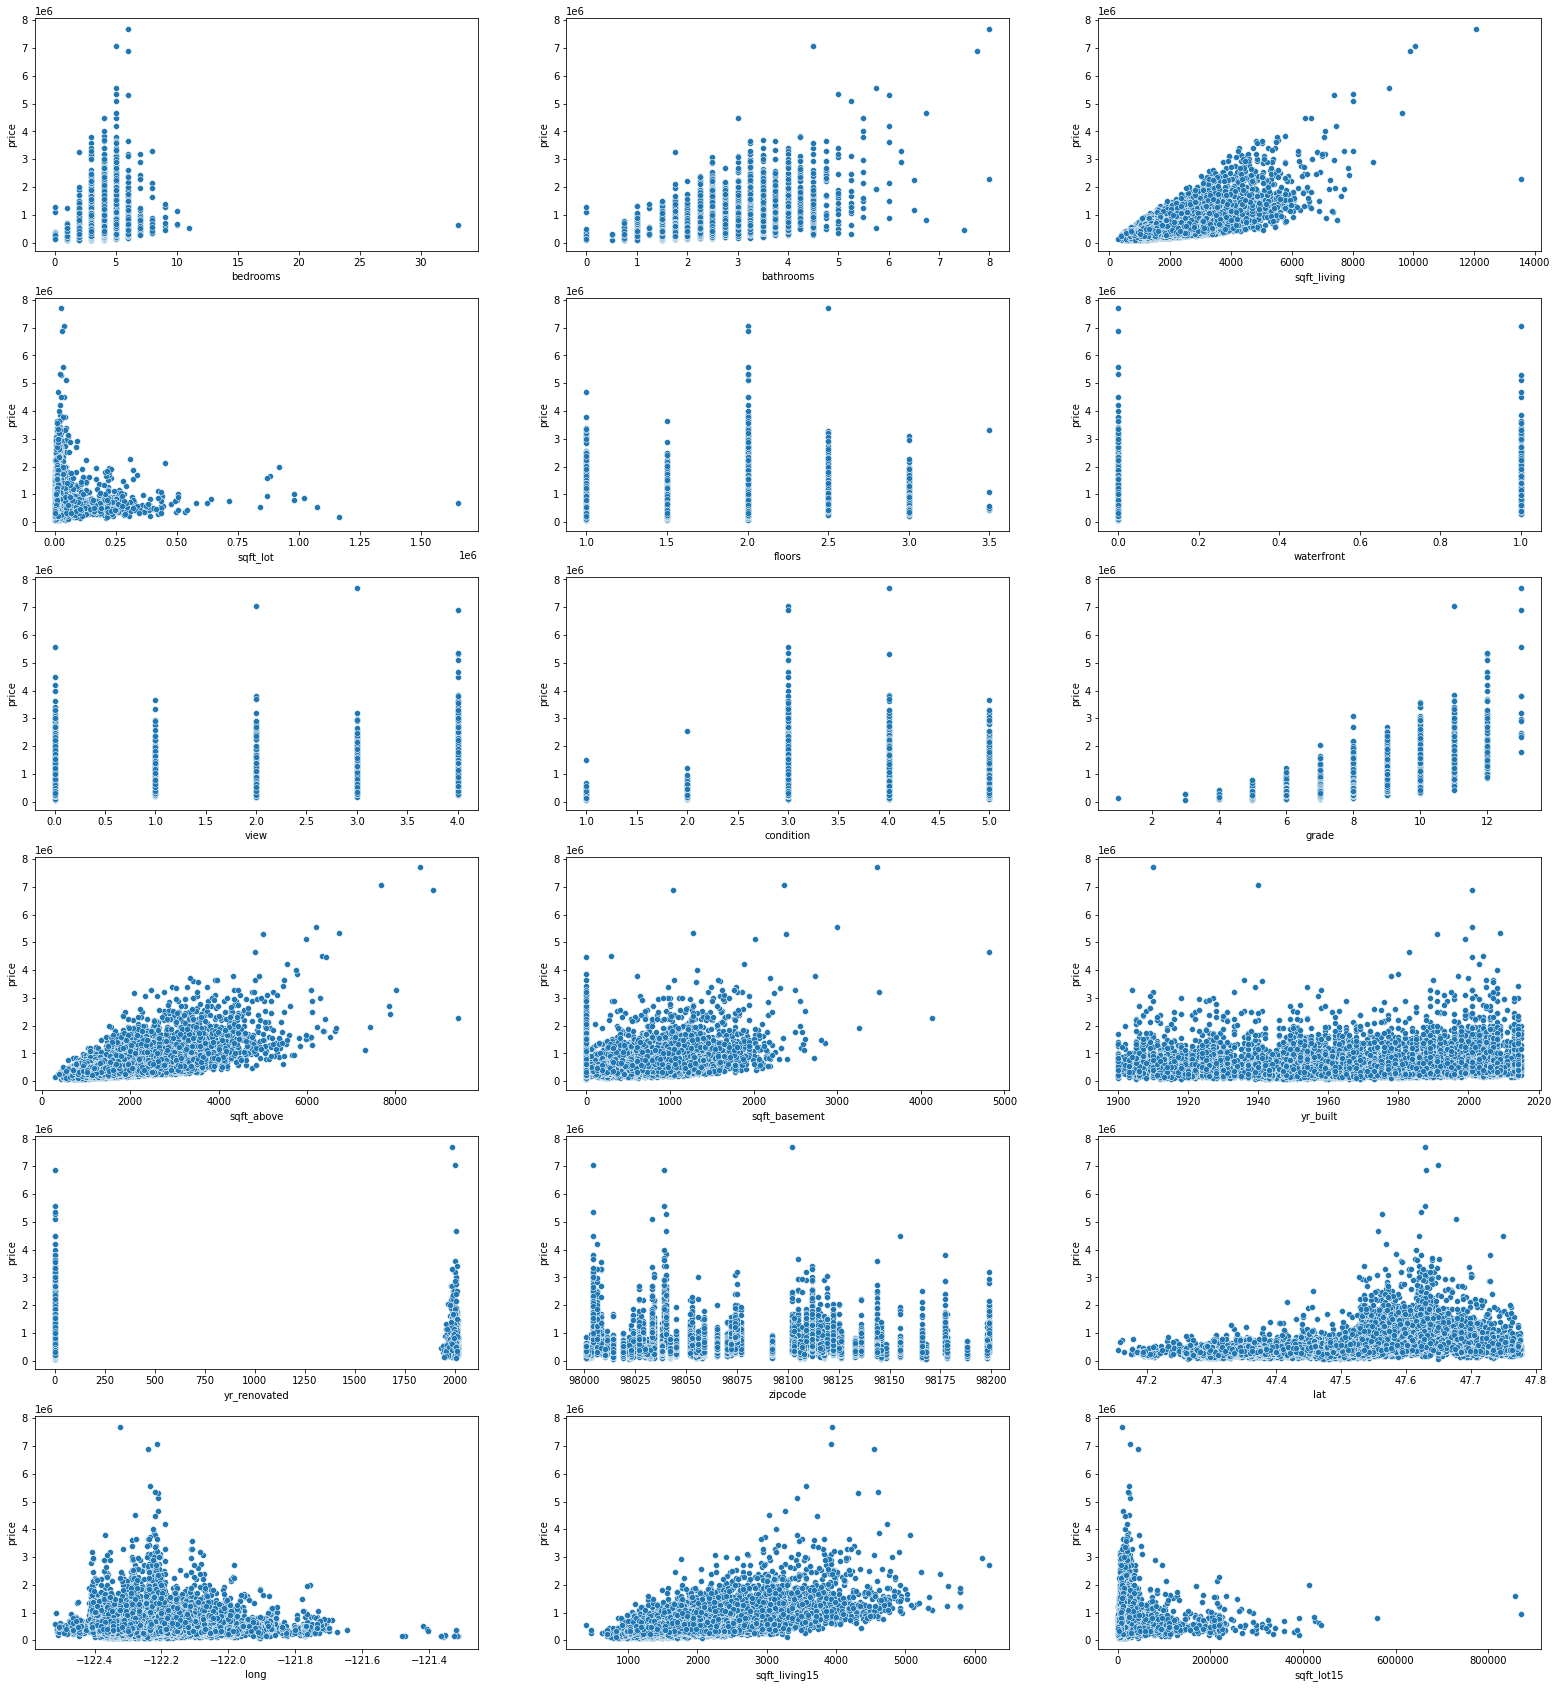

In [ ]:
# Scatterplot
fig, ax= plt.subplots(figsize=(27,30), ncols=3, nrows=6)
sns.scatterplot(x="bedrooms", y="price",data=data, ax=ax[0][0])
sns.scatterplot(x="bathrooms", y="price",data=data, ax=ax[0][1])
sns.scatterplot(x="sqft_living", y="price",data=data, ax=ax[0][2])
sns.scatterplot(x="sqft_lot", y="price",data=data, ax=ax[1][0])
sns.scatterplot(x="floors", y="price",data=data, ax=ax[1][1])
sns.scatterplot(x="waterfront", y="price",data=data, ax=ax[1][2])
sns.scatterplot(x="view", y="price",data=data, ax=ax[2][0])
sns.scatterplot(x="condition", y="price",data=data, ax=ax[2][1])
sns.scatterplot(x="grade", y="price",data=data, ax=ax[2][2])
sns.scatterplot(x="sqft_above", y="price",data=data, ax=ax[3][0])
sns.scatterplot(x="sqft_basement", y="price",data=data, ax=ax[3][1])
sns.scatterplot(x="yr_built", y="price",data=data, ax=ax[3][2])
sns.scatterplot(x="yr_renovated", y="price",data=data, ax=ax[4][0])
sns.scatterplot(x="zipcode", y="price",data=data, ax=ax[4][1])
sns.scatterplot(x="lat", y="price",data=data, ax=ax[4][2])
sns.scatterplot(x="long", y="price",data=data, ax=ax[5][0])
sns.scatterplot(x="sqft_living15", y="price",data=data, ax=ax[5][1])
sns.scatterplot(x="sqft_lot15", y="price",data=data, ax=ax[5][2])
plt.show();

### Split data into train and test based on 0.2/0.8 

In [ ]:
X = data[['sqft_living']].values
y = data.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)
print("X Train Shape", x_train.shape)
print("Y Train Shape", y_train.shape)
print("X Test Shape", x_test.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (17290, 17)
Y Train Shape (17290,)
X Test Shape (4323, 17)
Y Test Shape (4323,)


##### As we can see the data does not contain oversampling issue

In [ ]:
models_and_scores = []

### Create and Evaluation Model 
I compared regresison models in order to find the best prediction model. In this dataset I used to regression model in below: 


*   Linear Regression 
*   Decison Tree Regression
*   Random Forest Regression 
*   XGBoosting Regression 







In [ ]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

model_score = lr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  49.406905389089005
R Square               :  49.406905389089005
Mean Squared Error     :  76484977061.77612
Root Mean Squared Error:  276559.1746114674
Median Absolute Error  :  128405.24396719522
Explained Variance     :  0.49413707666920037


In [ ]:
models_and_scores.append(["LinearRegression",r_square])

In [ ]:
# multiple Linear Regression 

new_data = data[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_data.values
y = data.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(["Multiple Linear",r_square])

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  68.46839647422023
R Square               :  68.46839647422023
Mean Squared Error     :  47668441532.14094
Root Mean Squared Error:  218331.03657551974
Median Absolute Error  :  89135.35736166313
Explained Variance     :  0.6847542022050974


In [ ]:
# Decison Tree Regression 
new_data = data[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_data.values
y = data.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

model_score = dtr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  61.444865613712395
R Square               :  61.444865613712395
Mean Squared Error     :  58286384571.40238
Root Mean Squared Error:  241425.73303482457
Median Absolute Error  :  65000.0
Explained Variance     :  0.6144496659919753


In [ ]:
# Model1 Tuning
param_grid = {
    'max_depth': list(np.arange(1,30)),
    'min_samples_split': list(np.arange(1,10))
}

dtr_model = DecisionTreeRegressor(random_state=42)
dtr_cv_model = GridSearchCV(dtr_model, param_grid, cv=10, n_jobs=-1, verbose=2)
dtr_cv_model.fit(X_train, y_train)
print("Best Params: ", dtr_cv_model.best_params_)
print("Best Score : ", dtr_cv_model.best_score_)

y_pred = dtr_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(['Decision Tree', dtr_cv_model.best_score_])

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 10 folds for each of 261 candidates, totalling 2610 fits
Best Params:  {'max_depth': 9, 'min_samples_split': 9}
Best Score :  0.7535202028362169
R Square               :  71.68950816761419
Mean Squared Error     :  42798870775.94677
Root Mean Squared Error:  206878.87948252904
Median Absolute Error  :  58504.88421052636
Explained Variance     :  0.7169089564150837


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
290 fits failed out of a total of 2610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

#### Use GridSearchCV to search through the best parameter values from the given set of the grid of parameters. 
#### After that we gonna check the importance of chasen parameters 

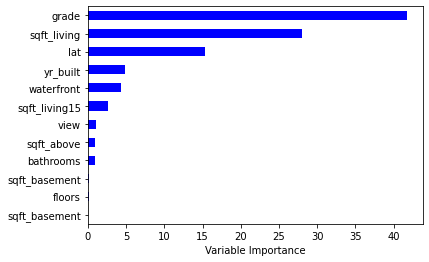

In [ ]:
columns = ['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']

Importance = pd.DataFrame({
    'Importance': dtr_cv_model.best_estimator_.feature_importances_*100}, index=columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

#### From this variable importance graph, we can see that grade, sqft_living, lat, yr_built, waterfront are the top 5 variables that are closely related to price prediction. 

In [ ]:
# Random Forest regresison 
new_data = data[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_data.values
y = data.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

model_score = rfr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(["RandomForest",r_square])

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  79.44327678962289
R Square               :  79.44327678962289
Mean Squared Error     :  31076978297.190254
Root Mean Squared Error:  176286.63675159912
Median Absolute Error  :  46714.42000000001
Explained Variance     :  0.7944537094661736


In [ ]:
# XGBoost 
new_data = data[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_data.values
y = data.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

model_score = xgb.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(["XGBoost",r_square])

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

[01:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Score            :  80.48674806860882
R Square               :  80.48674806860882
Mean Squared Error     :  29499492724.27476
Root Mean Squared Error:  171754.16363009883
Median Absolute Error  :  49347.4375
Explained Variance     :  0.8049298611202642


#### finally comparison 

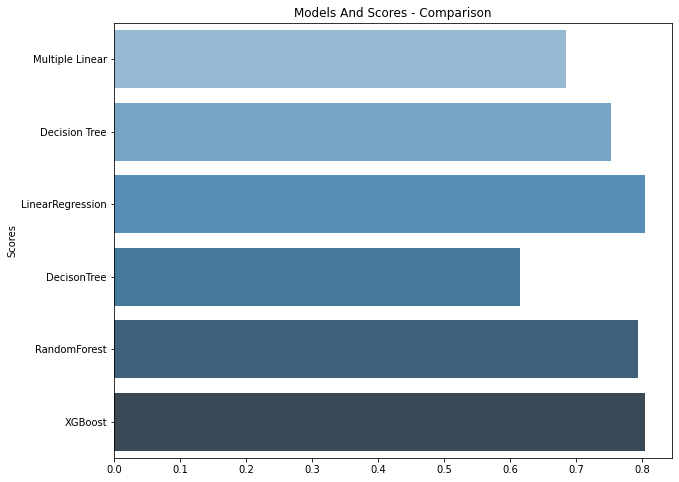

In [ ]:
models, scores = [], []

for x in models_and_scores:
    models.append(x[0])
    scores.append(x[1])

plt.figure(figsize=(10,8))
ax = sns.barplot(x=scores, y=models, palette="Blues_d")
ax.set_title("Models And Scores - Comparison")
ax.set_ylabel("Models")
ax.set_ylabel("Scores")
plt.show()

In summary, 

based on the scores, we can conclude that **XGBoost could be the best model for predicting house price in King Country**. As we noticed that even though LinearRegression performs well in final score, however, it contains much less information to fully understand the broader picture. RandomForest could be another prediction model. However, XGBoost has more advanatges over RandomForest in pratical.

Actually, in reality, one of the most importance difference bewteen XGBoost and random forest is that XGBoost always gives more imporatnce to functional space when reducing the cost of a model while random forest tries to give more preferences to hyperparameters to optimzie the model. 

One important thing I need to mention is that all of the model has high MSE score which is the thing that we need to improve future. 